In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

In [4]:
import zipfile

zip_path = "/content/drive/MyDrive/yolooo.zip"
extract_dir = "/content/data"  # Dossier où extraire

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction terminée dans :", extract_dir)

Extraction terminée dans : /content/data


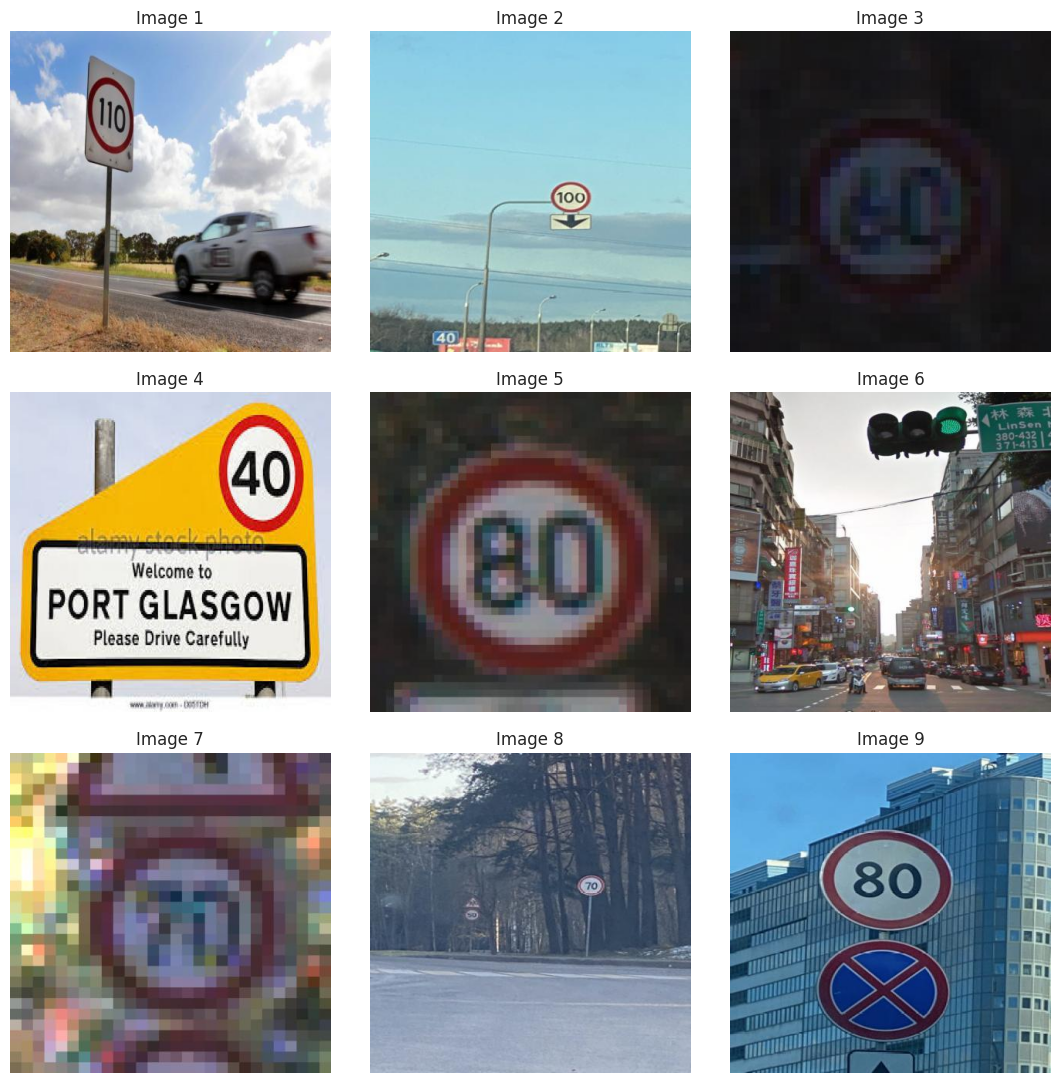

In [5]:
Image_dir = '/content/data/car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# Get the size of the image
image = cv2.imread("/content/data/car/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


100%|██████████| 6.25M/6.25M [00:00<00:00, 113MB/s]



image 1/1 /content/data/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 8.1ms
Speed: 15.8ms preprocess, 8.1ms inference, 146.8ms postprocess per image at shape (1, 3, 640, 640)


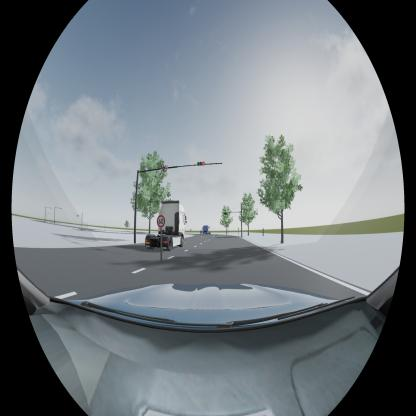

In [7]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/data/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [8]:
!pip install --upgrade ultralytics ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 MB 10.6 MB/s eta 0:00:00


In [9]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/content/data/car/data.yaml",epochs = 30, batch = -1, optimizer = 'auto')

Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data/car/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=

100%|██████████| 755k/755k [00:00<00:00, 26.7MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 109MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 942.8±367.5 MB/s, size: 24.1 KB)


train: Scanning /content/data/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:01<00:00, 2440.01it/s]

train: New cache created: /content/data/car/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.11G reserved, 0.08G allocated, 14.55G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3013773       8.209         0.405         37.53         347.3        (1, 3, 640, 640)                    list
     3013773       16.42         0.549         23.37         102.5        (2, 3, 640, 640)                    list
     3013773       32.84         0.870         24.36         90.42        (4, 3, 640, 640)                    list
     3013773       65.67         1.441         30.43         89.93        (8, 3, 640, 640)                    list
     3013773       131.3         2.

train: Scanning /content/data/car/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 339.2±251.2 MB/s, size: 19.9 KB)


val: Scanning /content/data/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 1123.21it/s]

val: New cache created: /content/data/car/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0004765625), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      7.56G     0.8739      3.765      1.214        110        640: 100%|██████████| 58/58 [00:59<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.37s/it]

                   all        801        944     0.0312      0.766      0.137      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      6.83G     0.7335      2.612       1.09        122        640: 100%|██████████| 58/58 [00:57<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.25s/it]

                   all        801        944      0.313      0.457      0.349      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      6.85G     0.7319      2.172      1.078        103        640: 100%|██████████| 58/58 [00:58<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.11s/it]

                   all        801        944      0.404      0.528      0.454      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      6.87G     0.7269      1.819      1.058        117        640: 100%|██████████| 58/58 [00:59<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.27s/it]

                   all        801        944      0.695      0.545      0.647      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      6.88G      0.681      1.533       1.04        106        640: 100%|██████████| 58/58 [00:58<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.33s/it]

                   all        801        944      0.771      0.613      0.711      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30       6.9G     0.6684      1.333      1.027        131        640: 100%|██████████| 58/58 [00:59<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.25s/it]

                   all        801        944      0.745      0.701      0.776      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      6.92G     0.6558      1.226      1.024        120        640: 100%|██████████| 58/58 [00:58<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.16s/it]

                   all        801        944      0.891      0.739      0.849      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      6.94G     0.6439      1.109      1.015        135        640: 100%|██████████| 58/58 [00:58<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.26s/it]

                   all        801        944      0.906      0.749      0.863      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      6.95G      0.643      1.038      1.018        115        640: 100%|██████████| 58/58 [00:57<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.31s/it]

                   all        801        944      0.864      0.765      0.842      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      6.97G     0.6358     0.9918       1.01        113        640: 100%|██████████| 58/58 [00:58<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.09s/it]

                   all        801        944      0.927      0.799      0.896      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      6.99G     0.6143     0.9305      1.001        108        640: 100%|██████████| 58/58 [00:57<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.16s/it]

                   all        801        944      0.909      0.798      0.885      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         7G     0.6105     0.8932     0.9998        113        640: 100%|██████████| 58/58 [00:56<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.34s/it]

                   all        801        944      0.914      0.821      0.901      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      7.02G     0.6094     0.8488     0.9966        116        640: 100%|██████████| 58/58 [00:58<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.08s/it]

                   all        801        944      0.902      0.821      0.899      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      7.04G     0.5858     0.8228     0.9862        105        640: 100%|██████████| 58/58 [00:56<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.25s/it]

                   all        801        944       0.91      0.829      0.907      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      7.05G     0.5867      0.793     0.9851        110        640: 100%|██████████| 58/58 [00:57<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.28s/it]

                   all        801        944      0.918      0.838      0.912      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      7.07G     0.5771     0.7593     0.9829        126        640: 100%|██████████| 58/58 [00:57<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.14s/it]

                   all        801        944       0.93      0.837      0.924      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      7.09G     0.5705     0.7312     0.9758        129        640: 100%|██████████| 58/58 [00:56<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.18s/it]

                   all        801        944      0.935      0.849      0.928      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      7.11G     0.5609     0.7268     0.9716        126        640: 100%|██████████| 58/58 [00:57<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.28s/it]

                   all        801        944      0.927      0.853      0.931      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      7.12G     0.5588     0.6998     0.9682        128        640: 100%|██████████| 58/58 [00:57<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.18s/it]

                   all        801        944      0.901       0.88      0.935      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.14G     0.5492     0.6846     0.9709        107        640: 100%|██████████| 58/58 [00:55<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.34s/it]

                   all        801        944       0.95      0.858      0.941      0.808


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.16G     0.5551     0.5101     0.9488         63        640: 100%|██████████| 58/58 [00:58<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.27s/it]

                   all        801        944      0.938      0.864      0.944      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.17G      0.546     0.4808     0.9342         70        640: 100%|██████████| 58/58 [00:54<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.04s/it]

                   all        801        944      0.943       0.87      0.939      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.19G       0.54     0.4605     0.9367         57        640: 100%|██████████| 58/58 [00:53<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.26s/it]

                   all        801        944      0.938      0.882      0.949      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      7.21G     0.5368     0.4365     0.9264         69        640: 100%|██████████| 58/58 [00:54<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.09s/it]

                   all        801        944      0.927      0.902      0.949      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.22G     0.5228     0.4207     0.9279         66        640: 100%|██████████| 58/58 [00:55<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.16s/it]

                   all        801        944      0.951      0.883      0.947      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      7.24G     0.5169     0.4128     0.9181         67        640: 100%|██████████| 58/58 [00:52<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.29s/it]

                   all        801        944      0.953      0.898      0.955      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      7.26G     0.5095     0.3925     0.9158         67        640: 100%|██████████| 58/58 [00:54<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.05s/it]

                   all        801        944      0.958      0.888      0.951      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      7.28G      0.503     0.3837     0.9123         67        640: 100%|██████████| 58/58 [00:53<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.29s/it]

                   all        801        944      0.946      0.887      0.955      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      7.29G     0.4957     0.3725     0.9128         68        640: 100%|██████████| 58/58 [00:53<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.10s/it]

                   all        801        944      0.951      0.896      0.956      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      7.31G     0.4907     0.3621     0.9028         68        640: 100%|██████████| 58/58 [00:53<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.12s/it]

                   all        801        944      0.955      0.899      0.957      0.828



30 epochs completed in 0.549 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.71s/it]


                   all        801        944      0.955      0.899      0.957      0.827
           Green Light         87        122        0.9      0.713      0.845      0.491
             Red Light         74        108      0.896      0.722      0.825      0.509
       Speed Limit 100         52         52      0.968      0.942      0.991      0.905
       Speed Limit 110         17         17      0.886      0.941      0.959      0.893
       Speed Limit 120         60         60      0.985      0.933      0.993      0.913
        Speed Limit 20         56         56      0.975      0.982      0.986      0.872
        Speed Limit 30         71         74      0.962      0.959      0.979      0.922
        Speed Limit 40         53         55      0.945      0.964       0.99      0.881
        Speed Limit 50         68         71      0.965      0.817       0.95      0.845
        Speed Limit 60         76         76      0.956      0.921      0.971      0.888
        Speed Limit 7

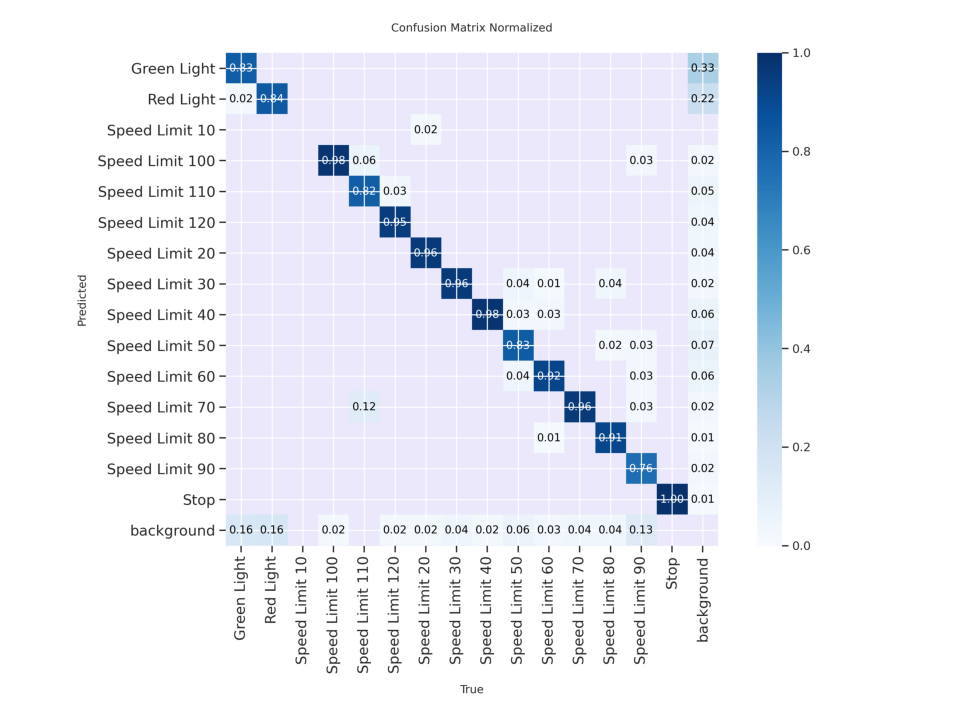

Error loading image: /content/runs/detect/train/F1_curve.png
Error loading image: /content/runs/detect/train/P_curve.png
Error loading image: /content/runs/detect/train/R_curve.png
Error loading image: /content/runs/detect/train/PR_curve.png


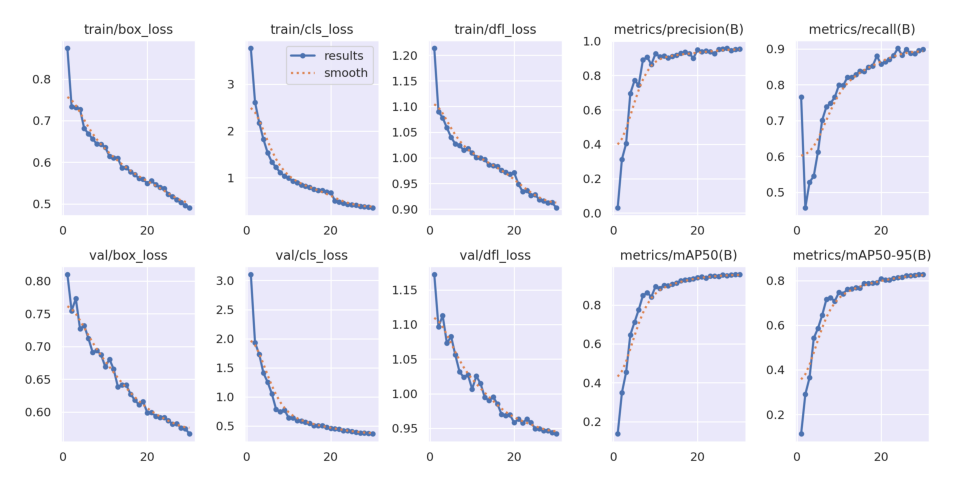

In [13]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)

        if img is None:
            print(f"Error loading image: {image_path}")
            continue  # Skip to the next image if loading fails

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
     'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/content/runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)

In [22]:
Result_Final_model = pd.read_csv('/content/runs/detect/train/results.csv')
Result_Final_model.tail(10)

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
20     21  1411.12         0.55512         0.51010         0.94878   
21     22  1473.11         0.54605         0.48078         0.93420   
22     23  1536.37         0.54002         0.46052         0.93667   
23     24  1598.66         0.53680         0.43652         0.92643   
24     25  1662.80         0.52283         0.42069         0.92787   
25     26  1725.79         0.51694         0.41281         0.91814   
26     27  1788.32         0.50950         0.39251         0.91584   
27     28  1851.96         0.50303         0.38371         0.91233   
28     29  1913.80         0.49568         0.37253         0.91284   
29     30  1976.11         0.49066         0.36206         0.90277   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
20               0.93766            0.86450           0.94438   
21               0.94336            0.87021           0.93937   
22               0.93828            0.88158           0.94870   
23               0.92692            0.90185           0.94863   
24               0.95069            0.88270           0.94701   
25               0.95329            0.89839           0.95524   
26               0.95789            0.88848           0.95095   
27               0.94581            0.88710           0.95518   
28               0.95118            0.89596           0.95594   
29               0.95457            0.89863           0.95714   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
20              0.80301       0.59904       0.45484       0.96325  0.000179   
21              0.80242       0.59348       0.44561       0.95753  0.000161   
22              0.80916       0.59123       0.41986       0.96355  0.000144   
23              0.81264       0.59144       0.42127       0.95824  0.000127   
24              0.81485       0.58682       0.40841       0.94939  0.000109   
25              0.82241       0.58151       0.39084       0.94930  0.000092   
26              0.82169       0.58193       0.38155       0.94624  0.000075   
27              0.82403       0.57566       0.38023       0.94635  0.000057   
28              0.82738       0.57455       0.37437       0.94356  0.000040   
29              0.82752       0.56657       0.36509       0.94201  0.000023   

      lr/pg1    lr/pg2  
20  0.000179  0.000179  
21  0.000161  0.000161  
22  0.000144  0.000144  
23  0.000127  0.000127  
24  0.000109  0.000109  
25  0.000092  0.000092  
26  0.000075  0.000075  
27  0.000057  0.000057  
28  0.000040  0.000040  
29  0.000023  0.000023

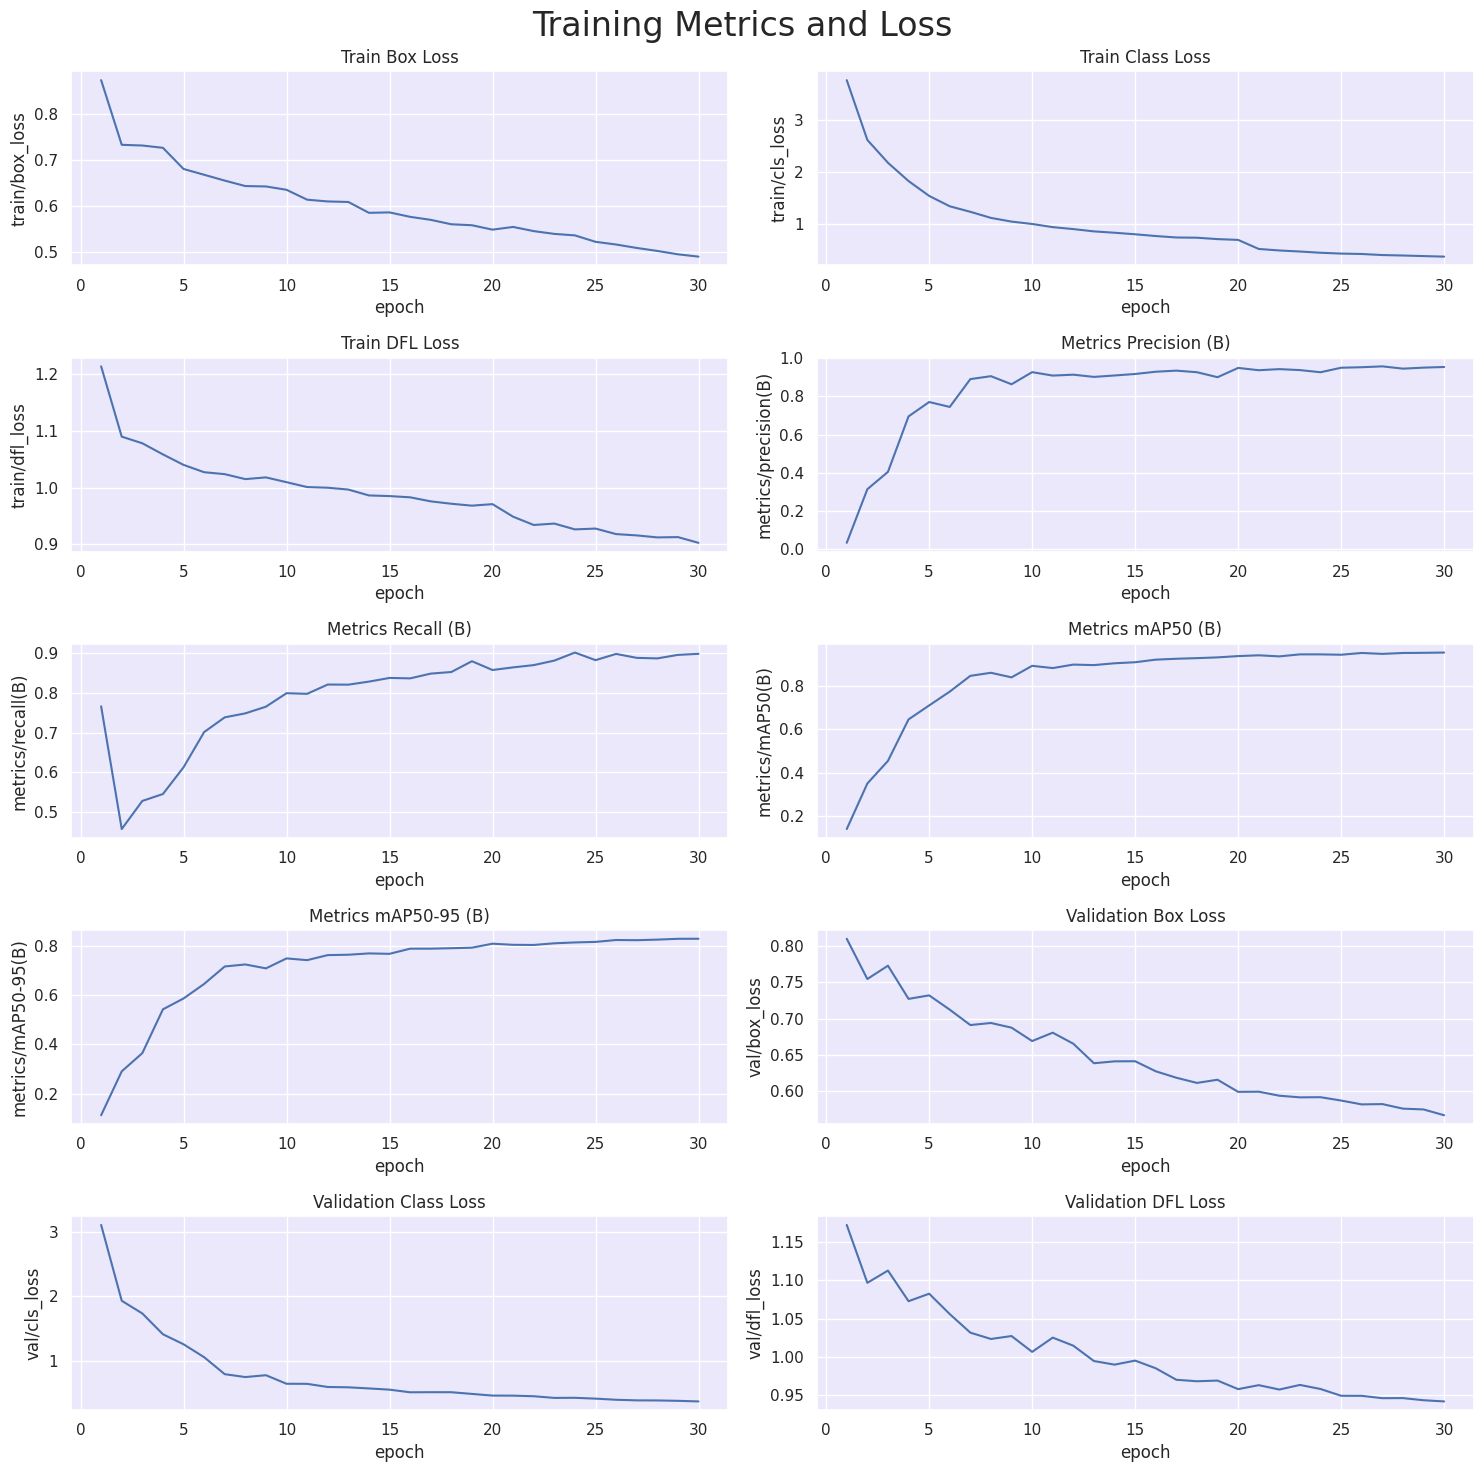

In [23]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])
# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [24]:
# Loading the best performing model
Valid_model = YOLO('/content/runs/detect/train/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1206.6±598.5 MB/s, size: 26.3 KB)


val: Scanning /content/data/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.26it/s]


                   all        801        944      0.955      0.899      0.957       0.83
           Green Light         87        122        0.9      0.713      0.849      0.502
             Red Light         74        108      0.896      0.721      0.825      0.507
       Speed Limit 100         52         52      0.969      0.942      0.991      0.904
       Speed Limit 110         17         17      0.886      0.941      0.959      0.899
       Speed Limit 120         60         60      0.985      0.933      0.993      0.918
        Speed Limit 20         56         56      0.975      0.982      0.986      0.871
        Speed Limit 30         71         74      0.962      0.959      0.979      0.923
        Speed Limit 40         53         55      0.946      0.964       0.99      0.887
        Speed Limit 50         68         71      0.962      0.817      0.949      0.849
        Speed Limit 60         76         76      0.956      0.921      0.972      0.887
        Speed Limit 7

In [25]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '//data/car'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])

            # Load image
            image = cv2.imread(image_path)

            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)

                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [26]:
!ffmpeg -y -loglevel panic -i /content/data/video.mp4 output.mp4
# Display the video
Video("output.mp4", width=960, embed=True)

In [27]:
Valid_model.predict(source="/content/data/video.mp4", save = True)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/508) /content/data/video.mp4: 640x640 1 Stop, 9.4ms
video 1/1 (frame 2/508) /content/data/video.mp4: 640x640 1 Stop, 10.2ms
video 1/1 (frame 3/508) /content/data/video.mp4: 640x640 1 Stop, 7.4ms
video 1/1 (frame 4/508) /content/data/video.mp4: 640x640 (no detections), 7.4ms
video 1/1 (frame 5/508) /content/data/video.mp4: 640x640 1 Stop, 7.4ms
video 1/1 (frame 6/508) /content/data/video.mp4: 640x640 1 Stop, 7.4ms
video 1/1 (frame 7/5

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Green Light', 1: 'Red Light', 2: 'Speed Limit 10', 3: 'Speed Limit 100', 4: 'Speed Limit 110', 5: 'Speed Limit 120', 6: 'Speed Limit 20', 7: 'Speed Limit 30', 8: 'Speed Limit 40', 9: 'Speed Limit 50', 10: 'Speed Limit 60', 11: 'Speed Limit 70', 12: 'Speed Limit 80', 13: 'Speed Limit 90', 14: 'Stop'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
     

In [31]:
!ffmpeg -y -loglevel panic -i /content/runs/detect/predict2/video.avi result_out.mp4

# Display the video
Video("result_out.mp4", width=960)

In [32]:
Valid_model.export(format='onnx')

Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 19, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.59', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 5.3s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.59...
ONNX: export success ✅ 7.4s, saved as '/content/runs/detect/train/weights/best.onnx' (11.7 MB)

Export complete (7.8s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=

'/content/runs/detect/train/weights/best.onnx'